# Supervised Machine Learning: feature selection


---
## 1.&nbsp;Import libraries & Read Data 💾

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# url = "https://drive.google.com/file/d/1c5210z-HSQ-Kv4EExbYIjjPq6lT0UYZW/view?usp=drive_link"
# path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# data = pd.read_csv(path)

---
## 2.&nbsp;Train-test split 🔀


In [ ]:
# Separate the features and target variable
X = data.drop("Id", axis=1).copy()
y = X.pop("SalePrice")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
## 3.&nbsp; Preprocessing 🧰


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline

# 0. Set the config so that we can view our preprocessor
set_config(display="diagram")

# 1. defining categorical & ordinal columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# 2. numerical pipeline , default strategy we search for the best parameters later
numeric_pipe = make_pipeline(
    SimpleImputer())

# 3. categorical pipeline

# # 3.1 defining ordinal & onehot columns
# .get_indexer() get's the index to solve the problem described above about losing column names
ordinal_cols = X_cat.columns.get_indexer(["Street",
                                          "CentralAir",
                                          "ExterQual",
                                          "ExterCond",
                                          "BsmtQual",
                                          "BsmtCond",
                                          "BsmtExposure",
                                          "BsmtFinType1",
                                          "KitchenQual",
                                          "FireplaceQu",
                                          "Alley",
                                          "LotShape",
                                          "Utilities",
                                          "LandSlope",
                                          "RoofMatl",
                                          "BsmtFinType2",
                                          "Functional",
                                          "GarageType",
                                          "GarageFinish",
                                          "GarageQual",
                                          "GarageCond",
                                          "PavedDrive",
                                          "PoolQC",
                                          "Fence"])


onehot_cols = X_cat.columns.get_indexer(["MSZoning",
                                         "Condition1",
                                         "Heating",
                                         "Foundation",
                                         "LotShape",
                                         "LotCongig",
                                         "Neighborhood",
                                         "Condition2",
                                         "BldgType",
                                         "HouseStyle",
                                         "LandContour",
                                         "LotConfig",
                                         "Neighborhood",
                                         "Condition2",
                                         "BldgType",
                                         "HouseStyle",
                                         "RoofStyle",
                                         "Exterior1st",
                                         "Exterior2nd",
                                         "MasVnrType",
                                         "HeatingQc",
                                         "Electrical",
                                         "MiscFeature",
                                         "SaleType",
                                         "SaleCondition"])


# # 3.2. defining the categorical encoder

Street_cats = [ "NA", "Pave", "Grvl"]
CentralAir_cats = ["NA","N", "Y" ]
ExterQual_cats = ["NA","Po","Fa","TA","Gd","Ex"]
ExterCond_cats = ["NA","Po","Fa","TA","Gd","Ex"]
BsmtQual_cats = ["NA","Po","Fa","TA","Gd","Ex"]
BsmtCond_cats = ["NA","Po","Fa","TA","Gd","Ex"]
BsmtExposure_cats = ["NA", "No","Mn","Av","Gd"]
BsmtFinType1_cats = ["NA", "Unf","LwQ","Rec","BLQ","ALQ","GLQ"]
KitchenQual_cats = ["NA","Po","Fa","TA","Gd","Ex"]
FireplaceQu_cats = ["NA","Po","Fa","TA","Gd","Ex"]
Alley_cats = [ "NA", "Pave", "Grvl"]
LotShape_cats = ["NA", "IR3","IR2","IR1","Reg"]
Utilities_cats = ["NA", "ELO","NoSeWa","NoSewr","AllPub"]
LandSlope_cats = ["NA", "Sev","Mod","Gtl"]
RoofMatl_cats = ["NA","WdShngl","WdShake","Tar&Grv","Roll","Metal","Membran","CompShg","ClyTile"]
BsmtFinType2_cats = ["NA", "Unf","LwQ","Rec","BLQ","ALQ","GLQ"]
Functional_cats = ["NA","Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"]
GarageType_cats = ["NA", "Detchd","CarPort","BuiltIn","Basment","Attchd","2Types"]
GarageFinish_cats = ["NA", "Unf","RFn","Fin"]
GarageQual_cats = ["NA","Po","Fa","TA","Gd","Ex"]
GarageCond_cats = ["NA","Po","Fa","TA","Gd","Ex"]
PavedDrive_cats = ["NA","N","P","Y"]
PoolQC_cats = ["NA","Fa","TA","Gd","Ex"]
Fence_cats = ["NA", "MnWw","GdWo","MnPrv","GdPrv"]



# # # 3.2.1. we manually establish the order of the categories for our ordinal feature (Cabin) from worst to best, including "N_A"

ordinal_cats = [Street_cats,
                CentralAir_cats,
                ExterQual_cats,
                ExterCond_cats,
                BsmtQual_cats,
                BsmtCond_cats,
                BsmtExposure_cats,
                BsmtFinType1_cats,
                KitchenQual_cats,
                FireplaceQu_cats,
                Alley_cats,
                LotShape_cats,
                Utilities_cats,
                LandSlope_cats,
                RoofMatl_cats,
                BsmtFinType2_cats,
                Functional_cats,
                GarageType_cats,
                GarageFinish_cats,
                GarageQual_cats,
                GarageCond_cats,
                PavedDrive_cats,
                PoolQC_cats,
                Fence_cats]

ordinal_encoder = OrdinalEncoder(categories=ordinal_cats)

# # # 3.2.2. defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", ordinal_encoder, ordinal_cols),
        ("cat_onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), onehot_cols),
    ]
)

# # 3.3. categorical pipeline = "N_A" imputer + categorical encoder
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="NA"),
                                 categorical_encoder
                                )

# 4. full preprocessing: a ColumnTransformer with 2 branches: numeric & categorical
full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)

full_preprocessing

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

---
## 4.&nbsp;Baseline Model 🧱


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

base_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  DecisionTreeRegressor())

base_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "decisiontreeregressor__max_depth": range(4,14,2),
    "decisiontreeregressor__min_samples_split": range(4, 12, 2),
    "decisiontreeregressor__min_samples_leaf": range(1, 5),
    "decisiontreeregressor__max_features": ["auto", "sqrt", "log2"]
}
# GridSearchCV for Base model (Decision Tree)
base_search = GridSearchCV(base_full_pipeline,
                          base_param_grid,
                          cv=5,
                          verbose=1)


In [ ]:
base_search.fit(X_train, y_train)

print(f"The best average score in cross validation was {base_search.best_score_}")
print(f"The best parameters are {base_search.best_params_}")

In [ ]:
# Make predictions on training and test sets
y_train_pred = base_search.predict(X_train)
y_test_pred = base_search.predict(X_test)

In [ ]:
# Calculate R-squared scores and root mean squared errors for training and test sets
from sklearn.metrics import r2_score, mean_squared_error
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create a DataFrame to store the model evaluation results
score_data = {
    'R2_Score': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test]
}

index_values = ['Train', 'Test']


In [ ]:
score_data

{'R2_Score': [0.9314144636800996, 0.7893969030544647],
 'RMSE': [20225.77283328439, 40191.970016610416]}

---
### 4.a&nbsp; Correlation Matrix 🔨

By having higly or sometimes perfectly correlating features, the model gives those features more importance. Removing highly correlated features, if there are any, should improve our model.


<ipython-input-31-5e566faf1dba>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = X_train.corr().abs()


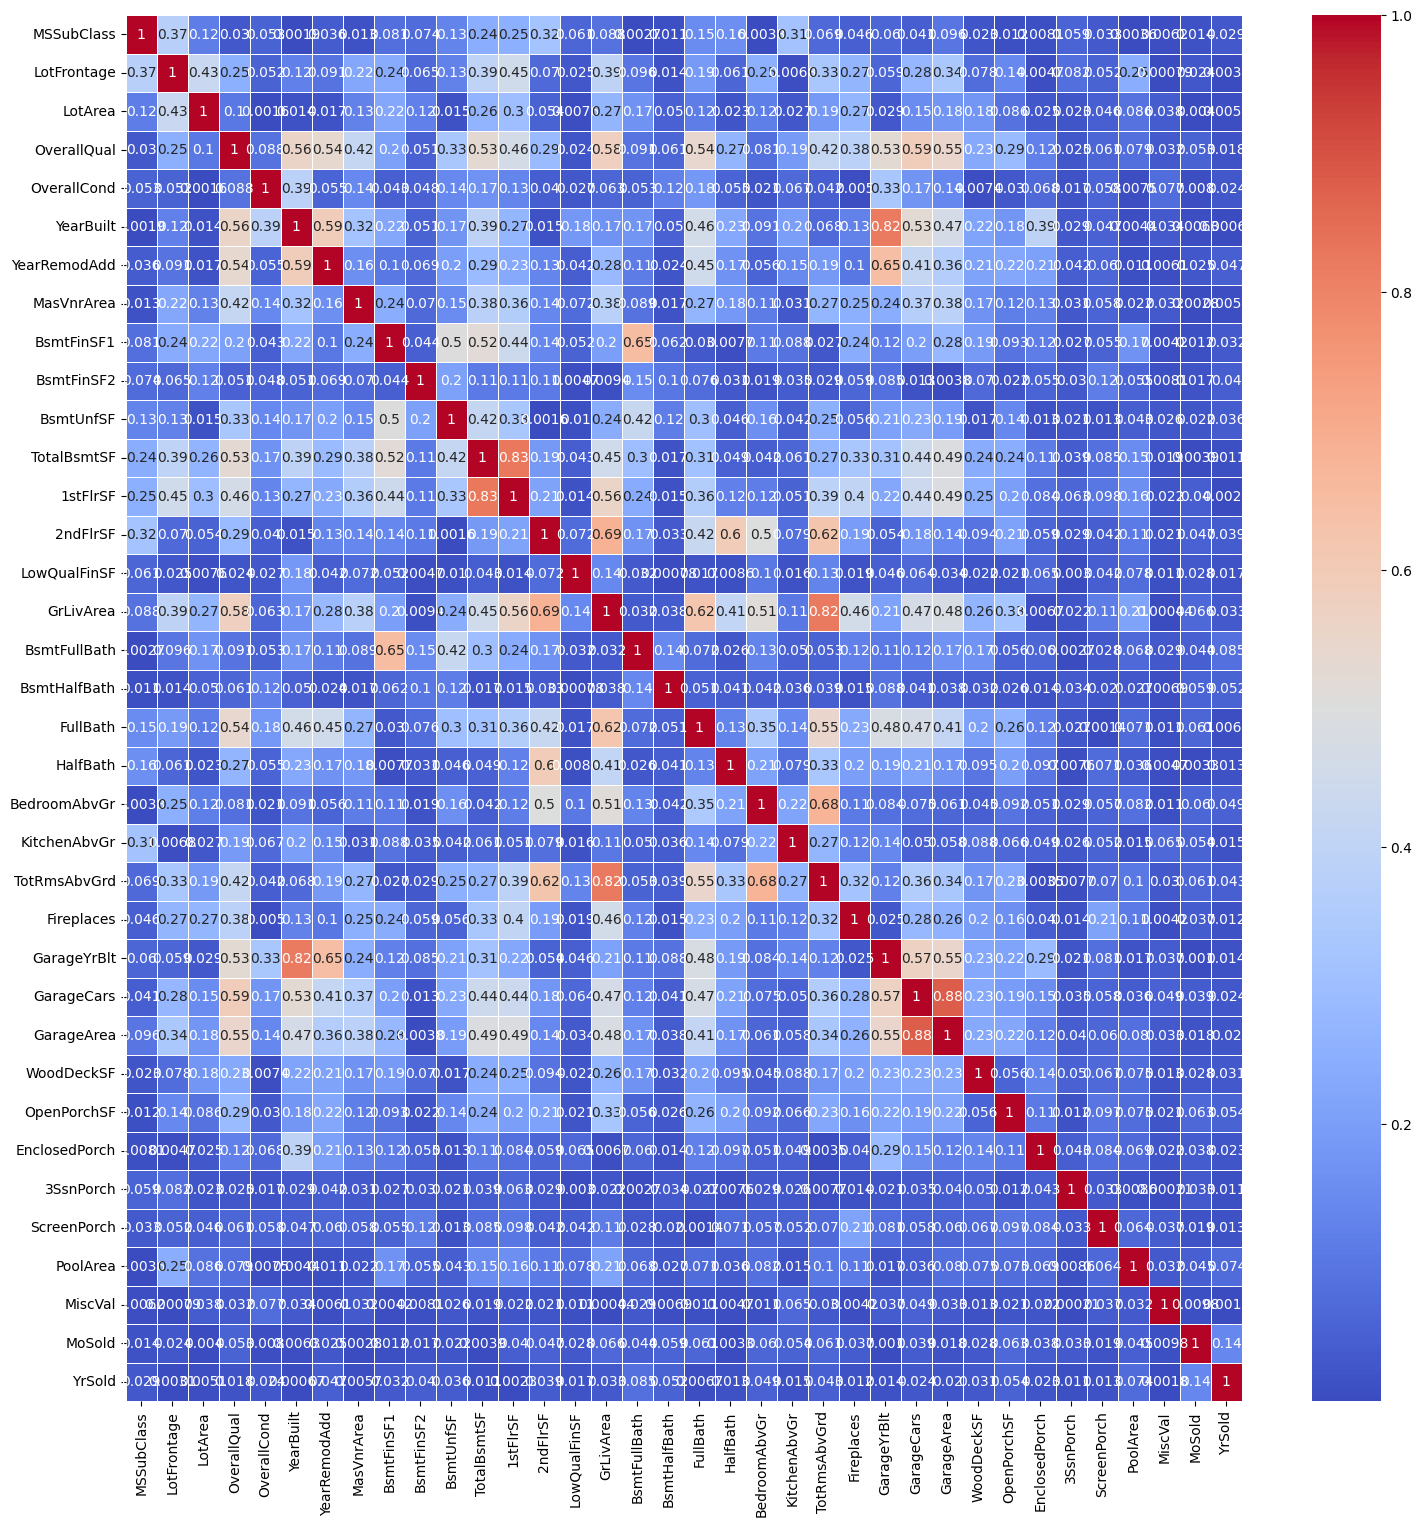

In [ ]:
# Check if any of the columns are highly correlated
# Calculate the absolute correlation matrix for the feature matrix X_train_var2
corrMatrix = X_train.corr().abs()

# Set the size of the heatmap to be 18x18 inches
plt.figure(figsize=(18, 18))

# Create a heatmap using Seaborn (sns) to visualize the correlation matrix
# 'annot=True' adds the correlation values to the cells for better readability
# 'cmap='coolwarm'' specifies the color map to be used, with warm colors (red) for positive correlations
# and cool colors (blue) for negative correlations
# 'linewidths' sets the width of the white lines around the squares
sns.heatmap(corrMatrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5);

In [ ]:
# Set the correlation threshold to consider columns as highly correlated
correlation_threshold = 0.90

# Initialise an empty list to store the pairs of highly correlated columns
highly_correlated_columns = []

# Get the number of features (columns) in the correlation matrix
num_features = len(corrMatrix.columns)

# Loop through the upper triangle of the correlation matrix to find highly correlated columns
# Note: We start from i+1 to avoid redundancy as correlation_matrix is symmetric
for i in range(num_features):
    for j in range(i + 1, num_features):
        # Check if the correlation value between columns i and j is greater than or equal to the threshold
        if corrMatrix.iloc[i, j] >= correlation_threshold:
            # Append the tuple (column_i, column_j) to the list of highly correlated columns
            highly_correlated_columns.append((corrMatrix.columns[i], corrMatrix.columns[j], f"correlation = {round(corrMatrix.iloc[i, j], 2)}"))

# Print the pairs of highly correlated columns
print("Highly correlated columns:", highly_correlated_columns)

Highly correlated columns: []


---
### 4.b&nbsp;Feature importance  🔧

In most cases a select few features will have most predictive power with some only introducing noise. By analyzing feature importances I hope to achieve the following 2 things:

1. Finetune the most important features - experiment with more robust scaling and imputing strategies for these
2. Remove noise

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming 'full_preprocessing' is your preprocessing pipeline
# Assuming X_train and X_test are your training and test datasets

base_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  DecisionTreeRegressor())

base_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "decisiontreeregressor__max_depth": range(4, 14, 2),
    "decisiontreeregressor__min_samples_split": range(4, 12, 2),
    "decisiontreeregressor__min_samples_leaf": range(1, 5),
    "decisiontreeregressor__max_features": ["auto", "sqrt", "log2"]
}

# GridSearchCV for Base model (Decision Tree)
base_search = GridSearchCV(base_full_pipeline,
                            base_param_grid,
                            cv=5,
                            verbose=1)

base_search.fit(X_train, y_train)

print(f"The best average score in cross-validation was {base_search.best_score_}")
print(f"The best parameters are {base_search.best_params_}")


In [ ]:
# Access the full preprocessing pipeline
full_preprocessing = best_estimator.named_steps['columntransformer']

# Transform the features using the preprocessing pipeline
X_train_transformed = full_preprocessing.transform(X_train)

# Get feature importances
feature_importances = decision_tree_model.feature_importances_

# If X_train_transformed is a NumPy array, get the feature names directly
if isinstance(X_train_transformed, np.ndarray):
    feature_names = full_preprocessing.get_feature_names_out(X_train.columns)
else:
    # If X_train_transformed is a DataFrame, use the columns
    feature_names = X_train_transformed.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Display or plot the feature importances
print(feature_importance_df)


In [ ]:
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance_df.head(10)

,Feature,Importance
3,num_pipe__OverallQual,0.68
15,num_pipe__GrLivArea,0.11
11,num_pipe__TotalBsmtSF,0.03
6,num_pipe__YearRemodAdd,0.02
12,num_pipe__1stFlrSF,0.02
8,num_pipe__BsmtFinSF1,0.02
5,num_pipe__YearBuilt,0.02
1,num_pipe__LotFrontage,0.01
26,num_pipe__GarageArea,0.01
53,cat_pipe__cat_ordinal__GarageType,0.01


The features with at least 1% importance in descending order are:
1. OverallQual - 68%
2. GrLivArea - 11%
3. TotalBsmtSF - 3%
4. YearRemodAdd - 2%
5. 1stFlrSF - 2%
6. BsmtFinSF1 - 2%
7. YearBuilt - 1%
8. LotFrontage - 1%
9. GarageArea - 1%

**Note that only 9 of the 78 features have predictive value.**

Therefore, I consider removing features that are less than 1% important - might be adjusted later - in order to remove noise. My base model was overfitting, could be due to the large amount of noise.

Instead of deciding based on 1 model that was not performing particularly well which features to remove, I run LazyPredict and get the important features of the top 5 models.

## 5.&nbsp;LazyPredict  😴

In [ ]:
# pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor


# Initialize and fit LazyRegressor
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the performance of each model
models

### 5.a &nbsp; XGBRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

xgb_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  XGBRegressor())

xgb_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "xgbregressor__max_depth": range(4, 12, 2),
    "xgbregressor__min_child_weight": range(1, 6, 2),
    "xgbregressor__subsample": [0.8, 0.9, 1.0],
    "xgbregressor__colsample_bytree": [0.8, 0.9, 1.0],
    "xgbregressor__learning_rate": [0.01, 0.1, 0.2],
    "xgbregressor__objective": ["reg:squarederror"],
}
# GridSearchCV for XGBRegressor
xgb_search = GridSearchCV(xgb_full_pipeline,
                          xgb_param_grid,
                          cv=5,
                          verbose=1)

xgb_search.fit(X_train, y_train)

print(f"The best average score in cross validation was {xgb_search.best_score_}")
print(f"The best parameters are {xgb_search.best_params_}")

# Make predictions on training and test sets
y_train_pred = xgb_search.predict(X_train)
y_test_pred = xgb_search.predict(X_test)

# Calculate R-squared scores and root mean squared errors for training and test sets
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create a DataFrame to store the model evaluation results
score_data = {
    'R2_Score': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test]
}

index_values = ['Train', 'Test']

In [ ]:
score_data

{'R2_Score': [0.9805807419520887, 0.913304549835915],
 'RMSE': [10762.301936134789, 25787.25234369622]}

In [ ]:
# Access the best XGBoost model from the grid search
best_xgb_model = xgb_search.best_estimator_.named_steps['xgbregressor']

# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# If X_train_transformed is a NumPy array, get the feature names directly
if isinstance(X_train_transformed, np.ndarray):
    feature_names = full_preprocessing.get_feature_names_out(X_train.columns)
else:
    # If X_train_transformed is a DataFrame, use the columns
    feature_names = X_train_transformed.columns

# Create a DataFrame to display feature importances
xgb_feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Display or plot the feature importances
print(xgb_feature_importances)


In [ ]:
xgb_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
xgb_feature_importances.head(50)

### 5.b &nbsp; GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  GradientBoostingRegressor())

gbr_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "gradientboostingregressor__max_depth": range(4, 10, 2),
    "gradientboostingregressor__min_samples_split": range(4, 10, 2),
    "gradientboostingregressor__min_samples_leaf": range(1, 5),
    "gradientboostingregressor__max_features": ["auto", "sqrt", "log2"],
    "gradientboostingregressor__learning_rate": [0.01, 0.1, 0.2],
}

# GridSearchCV for GradientBoostingRegressor
gbr_search = GridSearchCV(gbr_full_pipeline,
                          gbr_param_grid,
                          cv=5,
                          verbose=1)

gbr_search.fit(X_train, y_train)

print(f"The best average score in cross validation was {gbr_search.best_score_}")
print(f"The best parameters are {gbr_search.best_params_}")

# Make predictions on training and test sets
y_train_pred = gbr_search.predict(X_train)
y_test_pred = gbr_search.predict(X_test)

# Calculate R-squared scores and root mean squared errors for training and test sets
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create a DataFrame to store the model evaluation results
score_data = {
    'R2_Score': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test]
}

index_values = ['Train', 'Test']

In [ ]:
score_data

{'R2_Score': [0.9917604703789141, 0.8843807727687687],
 'RMSE': [7010.355877598348, 29779.811763784488]}

In [ ]:
# Access the best GradientBoostingRegressor model from the grid search
best_gbr_model = gbr_search.best_estimator_.named_steps['gradientboostingregressor']

# Get feature importances
feature_importances_gbr = best_gbr_model.feature_importances_

# If X_train_transformed is a NumPy array, get the feature names directly
if isinstance(X_train_transformed, np.ndarray):
    feature_names_gbr = full_preprocessing.get_feature_names_out(X_train.columns)
else:
    # If X_train_transformed is a DataFrame, use the columns
    feature_names_gbr = X_train_transformed.columns

# Create a DataFrame to display feature importances
gbr_feature_importances = pd.DataFrame({"Feature": feature_names_gbr, "Importance": feature_importances_gbr})

# Display or plot the feature importances
print(gbr_feature_importances)


In [ ]:
gbr_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
gbr_feature_importances.head(50)

### 5.c &nbsp; PoissonRegressor

In [ ]:
from sklearn.linear_model import PoissonRegressor

poi_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  PoissonRegressor())

poi_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "poissonregressor__alpha": [1e-3, 1e-2, 1e-1, 1.0],
    "poissonregressor__max_iter": [100, 200, 300],
}
# GridSearchCV for PoissonRegressor
poi_search = GridSearchCV(poi_full_pipeline,
                          poi_param_grid,
                          cv=5,
                          verbose=1)

poi_search.fit(X_train, y_train)

print(f"The best average score in cross validation was {poi_search.best_score_}")
print(f"The best parameters are {poi_search.best_params_}")

# Make predictions on training and test sets
y_train_pred = poi_search.predict(X_train)
y_test_pred = poi_search.predict(X_test)

# Calculate R-squared scores and root mean squared errors for training and test sets
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create a DataFrame to store the model evaluation results
score_data = {
    'R2_Score': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test]
}

index_values = ['Train', 'Test']

In [ ]:
score_data

{'R2_Score': [0.9255913580184747, 0.9085305880275518],
 'RMSE': [21066.89568467822, 26487.737310088705]}

In [ ]:
# Access the best PoissonRegressor model from the grid search
best_poi_model = poi_search.best_estimator_.named_steps['poissonregressor']

# Get feature importances (Note: PoissonRegressor does not have a direct feature_importances_ attribute)
# You may need to use a different approach to interpret feature importance for PoissonRegressor.

# Assuming you have access to coefficients for each feature, you can use them as "importances"
feature_importances_poi = best_poi_model.coef_

# If X_train_transformed is a NumPy array, get the feature names directly
if isinstance(X_train_transformed, np.ndarray):
    feature_names_poi = full_preprocessing.get_feature_names_out(X_train.columns)
else:
    # If X_train_transformed is a DataFrame, use the columns
    feature_names_poi = X_train_transformed.columns

# Create a DataFrame to display feature importances
poi_feature_importances = pd.DataFrame({"Feature": feature_names_poi, "Importance": feature_importances_poi})

# Display or plot the feature importances
print(poi_feature_importances)


In [ ]:
pd.set_option('display.max_rows', 100)
poi_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
poi_feature_importances.head(63)

### 5.d &nbsp; RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  RandomForestRegressor())

rfr_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "randomforestregressor__max_depth": range(4, 12, 2),
    "randomforestregressor__min_samples_split": range(4, 10, 2),
    "randomforestregressor__min_samples_leaf": range(1, 5),
    "randomforestregressor__max_features": ["auto", "sqrt", "log2"],
}
# GridSearchCV for RandomForestRegressor
rfr_search = GridSearchCV(rfr_full_pipeline,
                          rfr_param_grid,
                          cv=5,
                          verbose=1)

rfr_search.fit(X_train, y_train)

print(f"The best average score in cross validation was {rfr_search.best_score_}")
print(f"The best parameters are {rfr_search.best_params_}")

# Make predictions on training and test sets
y_train_pred = rfr_search.predict(X_train)
y_test_pred = rfr_search.predict(X_test)

# Calculate R-squared scores and root mean squared errors for training and test sets
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create a DataFrame to store the model evaluation results
score_data = {
    'R2_Score': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test]
}

index_values = ['Train', 'Test']

In [ ]:
score_data

{'R2_Score': [0.9675830959833663, 0.888435630007684],
 'RMSE': [13905.116222577792, 29252.950465557864]}

In [ ]:
# Access the best RandomForestRegressor model from the grid search
best_rfr_model = rfr_search.best_estimator_.named_steps['randomforestregressor']

# Get feature importances
feature_importances_rfr = best_rfr_model.feature_importances_

# If X_train_transformed is a NumPy array, get the feature names directly
if isinstance(X_train_transformed, np.ndarray):
    feature_names_rfr = full_preprocessing.get_feature_names_out(X_train.columns)
else:
    # If X_train_transformed is a DataFrame, use the columns
    feature_names_rfr = X_train_transformed.columns

# Create a DataFrame to display feature importances
rfr_feature_importances = pd.DataFrame({"Feature": feature_names_rfr, "Importance": feature_importances_rfr})

# Display or plot the feature importances
print(rfr_feature_importances)


                                         Feature  Importance
0                           num_pipe__MSSubClass        0.00
1                          num_pipe__LotFrontage        0.01
2                              num_pipe__LotArea        0.02
3                          num_pipe__OverallQual        0.56
4                          num_pipe__OverallCond        0.00
..                                           ...         ...
265  cat_pipe__cat_onehot__SaleCondition_AdjLand        0.00
266   cat_pipe__cat_onehot__SaleCondition_Alloca        0.00
267   cat_pipe__cat_onehot__SaleCondition_Family        0.00
268   cat_pipe__cat_onehot__SaleCondition_Normal        0.00
269  cat_pipe__cat_onehot__SaleCondition_Partial        0.00

[270 rows x 2 columns]


In [ ]:
rfr_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
rfr_feature_importances.head(20)

### 5.e &nbsp; LGBMRegressor

In [ ]:
# pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

lgbm_full_pipeline = make_pipeline(full_preprocessing,
                                  StandardScaler(),
                                  LGBMRegressor())

lgbm_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "lgbmregressor__max_depth": range(4, 12, 2),
    "lgbmregressor__min_child_samples": range(4, 12, 2),
    "lgbmregressor__subsample": [0.8, 0.9, 1.0],
    "lgbmregressor__learning_rate": [0.01, 0.1, 0.2],
}
# GridSearchCV for LGBMRegressor
lgbm_search = GridSearchCV(lgbm_full_pipeline,
                          lgbm_param_grid,
                          cv=5,
                          verbose=1)

lgbm_search.fit(X_train, y_train)

# Make predictions on training and test sets
y_train_pred = lgbm_search.predict(X_train)
y_test_pred = lgbm_search.predict(X_test)

# Calculate R-squared scores and root mean squared errors for training and test sets
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create a DataFrame to store the model evaluation results
score_data = {
    'R2_Score': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test]
}

index_values = ['Train', 'Test']

In [ ]:
score_data

{'R2_Score': [0.9746532104206101, 0.8960139740732077],
 'RMSE': [12295.617244031015, 28241.932296631454]}

In [ ]:
# Access the best LGBMRegressor model from the grid search
best_lgbm_model = lgbm_search.best_estimator_.named_steps['lgbmregressor']

# Get feature importances
feature_importances_lgbm = best_lgbm_model.feature_importances_

# If X_train_transformed is a NumPy array, get the feature names directly
if isinstance(X_train_transformed, np.ndarray):
    feature_names_lgbm = full_preprocessing.get_feature_names_out(X_train.columns)
else:
    # If X_train_transformed is a DataFrame, use the columns
    feature_names_lgbm = X_train_transformed.columns

# Create a DataFrame to display feature importances
lgbm_feature_importances = pd.DataFrame({"Feature": feature_names_lgbm, "Importance": feature_importances_lgbm})

# Display or plot the feature importances
print(lgbm_feature_importances)


In [ ]:
lgbm_feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
lgbm_feature_importances.head(70)

In [ ]:
# Final table for scores

R2 = [0.93, 0.79, 0.98, 0.91, 0.99, 0.88, 0.93, 0.91, 0.97, 0.89, 0.97, 0.90]
RMSE = [20225, 40191, 10762, 25787, 7010, 29779, 21067, 26488, 13905, 29253, 12296, 23242]


Scores = pd.DataFrame([R2, RMSE],
                      columns=["Dtree_train", "Dtree_test", "XGB_train","XGB_test", "Gradient_train", "Gradient_test", "Poisson_train", "Poisson_test", "Random_train", "Random_test", "Light_train", "Light_test"],
                      index=["R2","RMSE"])


Scores

,Dtree_train,Dtree_test,XGB_train,XGB_test,Gradient_train,Gradient_test,Poisson_train,Poisson_test,Random_train,Random_test,Light_train,Light_test
R2,0.93,0.79,0.98,0.91,0.99,0.88,0.93,0.91,0.97,0.89,0.97,0.90
RMSE,20225.00,40191.00,10762.00,25787.00,7010.00,29779.00,21067.00,26488.00,13905.00,29253.00,12296.00,23242.00



## 6.&nbsp;Most Important Features 💯

1. GarageCars
2. OverallQual
3. BsmtQual
4. GrLivArea
5. KitchenQual
6. 1stFlrSF
7. TotalBsmtSF
8. BsmtFinSF1
9. FireplaceQu
10. FullBath
11. Fireplaces
12. YearBuilt
13. 2ndFlrSF
14. BsmtFinType1
15. LotArea
16. GarageArea
17. TotRmsAbvGrd
18. YearRemodAdd


# Rinse & Repeat with less features

## 7.&nbsp;Creating the New DF ✨

In [3]:
url = "https://drive.google.com/file/d/1c5210z-HSQ-Kv4EExbYIjjPq6lT0UYZW/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
features_dropped_data = pd.read_csv(path)

In [4]:
# Separate the features and target variable
X_features = features_dropped_data.drop("Id", axis=1).copy()
y_features = X_features.pop("SalePrice")

# Split the data into training and test sets
X_features_train, X_features_test, y_features_train, y_features_test = train_test_split(X_features, y_features, test_size=0.2, random_state=42)

In [5]:
columns_to_drop = ['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                   'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
                   'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
                   'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
                   'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                   'Functional','GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive',
                   'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
                   'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice','Id']

# Drop specified columns
features_dropped_data.drop(columns=columns_to_drop, inplace=True)

## 8.&nbsp; Preprocessor 🔢

In [9]:
# 0. Set the config so that we can view our preprocessor
set_config(display="diagram")

# 1. defining categorical & ordinal columns
X_features_cat = X_features.select_dtypes(exclude="number").copy()
X_features_num = X_features.select_dtypes(include="number").copy()

# 2. numerical pipeline , default strategy we search for the best parameters later
features_numeric_pipe = make_pipeline(
    SimpleImputer())

# 3. categorical pipeline

# # 3.1 defining ordinal columns
# .get_indexer() get's the index to solve the problem described above about losing column names
ordinal_features_cols = X_features_cat.columns.get_indexer(["BsmtQual",
                                          "BsmtFinType1",
                                          "KitchenQual",
                                          "FireplaceQu"])

# # 3.2. defining the categorical encoder

BsmtQual_cats = ["NA","Po","Fa","TA","Gd","Ex"]
BsmtFinType1_cats = ["NA", "Unf","LwQ","Rec","BLQ","ALQ","GLQ"]
KitchenQual_cats = ["NA","Po","Fa","TA","Gd","Ex"]
FireplaceQu_cats = ["NA","Po","Fa","TA","Gd","Ex"]

# # # 3.2.1. we manually establish the order of the categories for our ordinal feature (Cabin) from worst to best, including "N_A"

ordinal_features_cats = [BsmtQual_cats,
                BsmtFinType1_cats,
                KitchenQual_cats,
                FireplaceQu_cats,]

ordinal_features_encoder = OrdinalEncoder(categories=ordinal_features_cats)

# 3.2.2. defining the categorical encoder: a ColumnTransformer with only the ordinal branch
categorical_features_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", ordinal_features_encoder, ordinal_features_cols),
    ]
)

# 3.3. categorical pipeline = "N_A" imputer + categorical encoder
categorical_features_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="NA"),
                                 categorical_features_encoder
                                )

# 4. full preprocessing: a ColumnTransformer with 2 branches: numeric & categorical
full_features_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", features_numeric_pipe, X_features_num.columns),
        ("cat_pipe", categorical_features_pipe, X_features_cat.columns),
    ]
)

full_features_preprocessing


ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

### 8.a &nbsp; Baseline Improvement 📈

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

features_base_full_pipeline = make_pipeline(full_features_preprocessing,
                                  StandardScaler(),
                                  DecisionTreeRegressor())

features_base_param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "decisiontreeregressor__max_depth": range(4,14,2),
    "decisiontreeregressor__min_samples_split": range(4, 12, 2),
    "decisiontreeregressor__min_samples_leaf": range(1, 5),
    "decisiontreeregressor__max_features": ["auto", "sqrt", "log2"]
}
# GridSearchCV for Base model (Decision Tree)
features_base_search = GridSearchCV(features_base_full_pipeline,
                          features_base_param_grid,
                          cv=5,
                          verbose=1)

features_base_search.fit(X_features_train, y_features_train)

print(f"The best average score in cross validation was {features_base_search.best_score_}")
print(f"The best parameters are {features_base_search.best_params_}")

# Make predictions on training and test sets
y_train_pred = features_base_search.predict(X_features_train)
y_test_pred = features_base_search.predict(X_features_test)

# Calculate R-squared scores and root mean squared errors for training and test sets
from sklearn.metrics import r2_score, mean_squared_error
r2_train = r2_score(y_features_train, y_train_pred)
r2_test = r2_score(y_features_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_features_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_features_test, y_test_pred))

# Create a DataFrame to store the model evaluation results
score_data = {
    'R2_Score': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test]
}

index_values = ['Train', 'Test']


## 9.&nbsp; Data Analysis 🕵

In [6]:
features_dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   YearBuilt     1460 non-null   int64 
 3   YearRemodAdd  1460 non-null   int64 
 4   BsmtQual      1423 non-null   object
 5   BsmtFinType1  1423 non-null   object
 6   BsmtFinSF1    1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   1stFlrSF      1460 non-null   int64 
 9   2ndFlrSF      1460 non-null   int64 
 10  GrLivArea     1460 non-null   int64 
 11  FullBath      1460 non-null   int64 
 12  KitchenQual   1460 non-null   object
 13  TotRmsAbvGrd  1460 non-null   int64 
 14  Fireplaces    1460 non-null   int64 
 15  FireplaceQu   770 non-null    object
 16  GarageCars    1460 non-null   int64 
 17  GarageArea    1460 non-null   int64 
dtypes: int64(14), object(4)
memory usage: 205.4+ KB


In [10]:
features_dropped_data.describe()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,1971.267808,1984.865753,443.639726,1057.429452,1162.626712,346.992466,1515.463699,1.565068,6.517808,0.613014,1.767123,472.980137
std,9981.264932,1.382997,30.202904,20.645407,456.098091,438.705324,386.587738,436.528436,525.480383,0.550916,1.625393,0.644666,0.747315,213.804841
min,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,1.000000,5.000000,0.000000,1.000000,334.500000
50%,9478.500000,6.000000,1973.000000,1994.000000,383.500000,991.500000,1087.000000,0.000000,1464.000000,2.000000,6.000000,1.000000,2.000000,480.000000
75%,11601.500000,7.000000,2000.000000,2004.000000,712.250000,1298.250000,1391.250000,728.000000,1776.750000,2.000000,7.000000,1.000000,2.000000,576.000000
max,215245.000000,10.000000,2010.000000,2010.000000,5644.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,14.000000,3.000000,4.000000,1418.000000


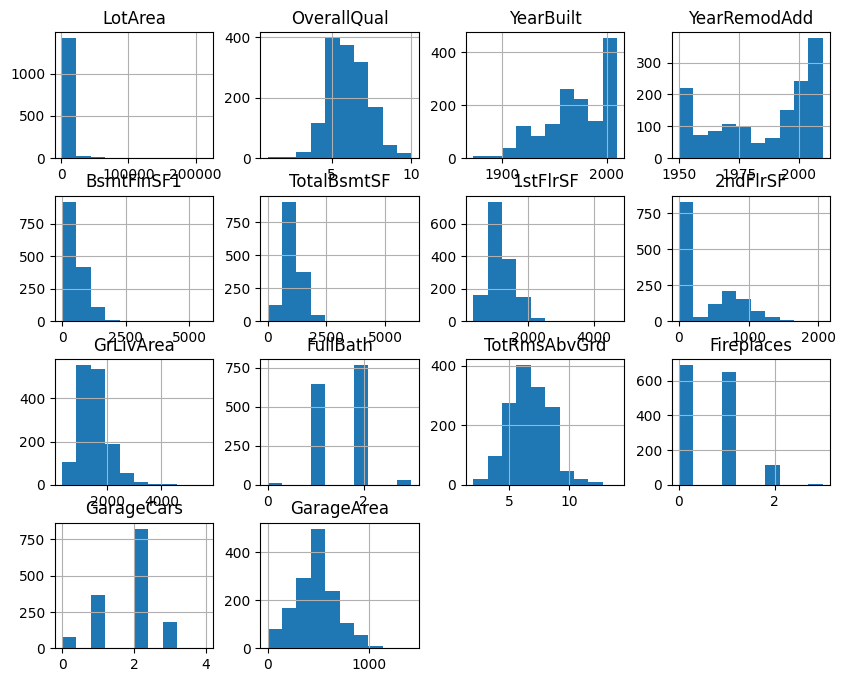

In [12]:
features_dropped_data.hist(figsize = (10,8));

In [ ]:
# Check if any of the columns are highly correlated
# Calculate the absolute correlation matrix for the feature matrix X_train_var2
corrMatrix = X_features_train.corr().abs()

# Set the size of the heatmap to be 18x18 inches
plt.figure(figsize=(18, 18))

# Create a heatmap using Seaborn (sns) to visualize the correlation matrix
# 'annot=True' adds the correlation values to the cells for better readability
# 'cmap='coolwarm'' specifies the color map to be used, with warm colors (red) for positive correlations
# and cool colors (blue) for negative correlations
# 'linewidths' sets the width of the white lines around the squares
sns.heatmap(corrMatrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5);

## 10.&nbsp; LogTransform, MinMaxScale, KNNImpute 💪

In [27]:
from scipy.stats import boxcox
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline

# Define a custom transformer for Box-Cox transformation
def boxcox_transform(X):
    transformed_data, _ = boxcox(X)
    return transformed_data.reshape(-1, 1)

# 2. Numerical pipeline with Box-Cox transformation, MinMax scaling, and KNN imputation
features_numeric_pipe = make_pipeline(
    FunctionTransformer(boxcox_transform, validate=False),
    MinMaxScaler(),
    KNNImputer()
)

# 3. Categorical pipeline with ordinal encoding
ordinal_features_cols = X_features_cat.columns.get_indexer(["BsmtQual", "BsmtFinType1", "KitchenQual", "FireplaceQu"])
ordinal_features_cats = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]

ordinal_features_encoder = OrdinalEncoder(categories=[ordinal_features_cats] * len(ordinal_features_cols))

categorical_features_pipe = make_pipeline(
    KNNImputer(),
    ColumnTransformer(
        transformers=[
            ("cat_ordinal", ordinal_features_encoder, ordinal_features_cols),
        ]
    )
)

# 4. Full preprocessing with Box-Cox transformation for numerical features, MinMax scaling, and KNN imputation for both numerical and categorical features
full_features_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", features_numeric_pipe, X_features_num.columns),
        ("cat_pipe", categorical_features_pipe, X_features_cat.columns),
    ]
)



## 11.&nbsp; Final Modelling 💅

In [28]:
# pip install lazypredict

In [56]:
import lazypredict
from lazypredict.Supervised import LazyRegressor


# Initialize and fit LazyRegressor
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_features_train, X_features_test, y_features_train, y_features_test)

# Print the performance of each model
models

100%|██████████| 42/42 [00:01<00:00, 22.15it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


In [ ]:
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import PoissonRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize your models with the best parameters
xgb_model = XGBRegressor()
gbr_model = GradientBoostingRegressor()
poi_model = PoissonRegressor()
rfr_model = RandomForestRegressor()
lgbm_model = LGBMRegressor()


# Create a dictionary of your models
models = {
    'xgb': xgb_model,
    'gbr': gbr_model,
    'poi': poi_model,
    'rfr': rfr_model,
    'lgbm': lgbm_model
}

# Create a full preprocessing pipeline
full_features_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", features_numeric_pipe, X_features_num.columns),
        ("cat_pipe", categorical_features_pipe, X_features_cat.columns),
    ]
)

# Create a VotingRegressor pipeline
voting_regressor = make_pipeline(
    full_features_preprocessing,
    VotingRegressor(
        estimators=[(name, model) for name, model in models.items()]
    )
)

# Fit the ensemble model on your training data
X_features_train = X_features_train.to_numpy()
voting_regressor.fit(X_features_train, y_features_train)

# Predict using the ensemble model
voting_predictions = voting_regressor.predict(X_features_test)

# Calculate mean squared error (or any other regression metric)
final_mse = mean_squared_error(y_features_test, voting_predictions)
print(f"Ensemble Model Mean Squared Error: {final_mse}")
